<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Exploration : Dimensional reduction </h1></center>

--------------------

# t-distribued Stochastic Neighbor Embleding (t-SNE)

Exploration process before apply machine learning on craft data. Not-linear reduction of dimensions calculating similarities with Student-distribued probabilities to project individuals into 2 dimensional space, keeping smallest distances within neighbors. 

### import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray
import sklearn
import plotly.express as px

import sys
sys.path.append("../")
import utils

from sklearn.manifold import TSNE

### Loading data

In [2]:
CI02 = pd.DataFrame(np.load("../data/for_learning_plus/CI02.npy"),
                    columns=['Y', 'dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
                    )
# CI04 = utils.load_data("../data/for_learning/CI04.npy")
# CI06 = utils.load_data("../data/for_learning/CI06.npy")
# CI09 = utils.load_data("../data/for_learning/CI09.npy")
# CI21 = utils.load_data("../data/for_learning/CI21.npy")

## t-SNE on CI02 with anisotropy factors

### Variables selection

In [3]:
data = CI02
features = ['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid',
                    'misangle', 'eqStrain', 'eqStress', 'act_pr', 'act_py', 'work',
                             'relativ_an', 'fractional_an', 'volratio_an', 'flatnes_an']
data['Y'] = data['Y'].astype(object)
X = data[features] 
y = data['Y']  

### Normalization

In [4]:
norm_X = (X - X.mean())/X.std()

### Apply t-SNE

In [5]:
tsne = TSNE(n_components=2,perplexity=30,n_iter=300, learning_rate='auto',init='random',verbose=1)
res_tsne  = tsne.fit_transform(norm_X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 255840 samples in 1.001s...
[t-SNE] Computed neighbors for 255840 samples in 316.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 255840
[t-SNE] Computed conditional probabilities for sample 2000 / 255840
[t-SNE] Computed conditional probabilities for sample 3000 / 255840
[t-SNE] Computed conditional probabilities for sample 4000 / 255840
[t-SNE] Computed conditional probabilities for sample 5000 / 255840
[t-SNE] Computed conditional probabilities for sample 6000 / 255840
[t-SNE] Computed conditional probabilities for sample 7000 / 255840
[t-SNE] Computed conditional probabilities for sample 8000 / 255840
[t-SNE] Computed conditional probabilities for sample 9000 / 255840
[t-SNE] Computed conditional probabilities for sample 10000 / 255840
[t-SNE] Computed conditional probabilities for sample 11000 / 255840
[t-SNE] Computed conditional probabilities for sample 12000 / 255840
[t-SNE] Computed conditional proba

## Results

### Projection of individuals on 2 dimensional space with labeling for pixel status

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

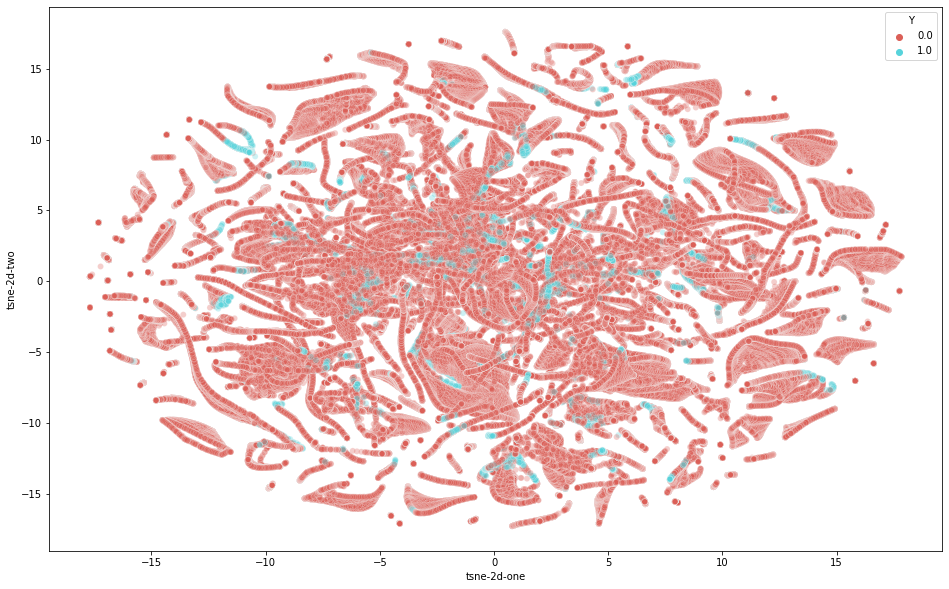

In [6]:
import seaborn as sns

data['tsne-2d-one'] = res_tsne[:,0]
data['tsne-2d-two'] = res_tsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Y",
    palette=sns.color_palette("hls", 2),
    data=data,
    legend="full",
    alpha=0.3
)